# **Section1 Project**


- 개요 : 게임 데이터를 분석하여 다음 분기 제작 게임을 기획하시오 <br>
- 데이터 : 1981년부터 현재까지 전세계에서 발행된 16000여개의 비디오 게임 <br>
- 보고서 : https://docs.google.com/presentation/d/1eFGuL7MZRQXWdkBWgRr3xhbmIN2nGjr8VGWe_jQ_2uk/edit?usp=sharing

# **1. 데이터셋 전처리**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [ ]:
games = pd.read_csv('vgames2.csv')
games.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04


In [ ]:
games.shape

(16598, 10)

In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   16598 non-null  int64 
 1   Name         16598 non-null  object
 2   Platform     16598 non-null  object
 3   Year         16327 non-null  object
 4   Genre        16548 non-null  object
 5   Publisher    16540 non-null  object
 6   NA_Sales     16598 non-null  object
 7   EU_Sales     16598 non-null  object
 8   JP_Sales     16598 non-null  object
 9   Other_Sales  16596 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.3+ MB


In [ ]:
# 데이터셋 카피
games_clean =  games.copy()

####**1-1 필요없는 컬럼 삭제**

In [ ]:
games_clean.drop(columns = ['Unnamed: 0', 'Publisher'], inplace = True)

####**1-2 결측치 처리**

In [ ]:
games_clean.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      2
dtype: int64

In [ ]:
#year, Genre 컬럼 결측치 확인
year_null = games_clean[games_clean.Year.isnull()]
genre_null = games_clean[games_clean.Genre.isnull()]

In [ ]:
#Name이 같은 자료를 찾으면 Year 또는 Genre를 채워넣을 수가 있다
name_same_sample = games_clean[games_clean.Name == "Freaky Flyers"]
name_same_sample

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
7202,Freaky Flyers,PS2,2003,Racing,0.05,0.04,0M,0.01
13201,Freaky Flyers,XB,2003,Racing,0.02,0.01,0,0
16240,Freaky Flyers,GC,NaN,Racing,0.01,0,0,0


In [ ]:
#Year 컬럼 결측치 채우기
for index, row in year_null.iterrows():
  name_same = games_clean[games_clean.Name == row['Name']]
  
  if name_same.Year.notnull().sum() >= 1:
    name_same_notnull = name_same[name_same.Year.notnull()]
    games_clean.iloc[index]['Year'] = name_same_notnull.iloc[0]['Year']
  else :
    games_clean.iloc[index]['Year'] = np.nan

#Genre 컬럼 결측치 채우기
for index, row in genre_null.iterrows():
  name_same = games_clean[games_clean.Name == row['Name']]
  
  if name_same.Genre.notnull().sum() >= 1:
    name_same_notnull = name_same[name_same.Genre.notnull()]
    games_clean.iloc[index]['Genre'] = name_same_notnull.iloc[0]['Genre']
  else :
    games_clean.iloc[index]['Genre'] = np.nan


In [ ]:
#Year, Genre 결측치 축소 확인
games_clean.isnull().sum()

Name             0
Platform         0
Year           147
Genre           30
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      2
dtype: int64

In [ ]:
#Other_Sales 결측치 확인
other_null = games_clean[games_clean.Other_Sales.isnull()]
other_null

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
7596,"B's-LOG Party??,PSP""",2010,Adventure,Idea Factory,0,0.04,0,NaN
16191,Boku no Natsuyasumi 3: Hokkoku Hen: Chiisana B...,2007,Adventure,Sony Computer Entertainment,0,0.08,0,NaN


In [ ]:
#대체할만한 값이 없는 결측치 모두 삭제
games_clean.dropna(axis=0, inplace=True)

In [ ]:
games_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16419 entries, 0 to 16597
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         16419 non-null  object
 1   Platform     16419 non-null  object
 2   Year         16419 non-null  object
 3   Genre        16419 non-null  object
 4   NA_Sales     16419 non-null  object
 5   EU_Sales     16419 non-null  object
 6   JP_Sales     16419 non-null  object
 7   Other_Sales  16419 non-null  object
dtypes: object(8)
memory usage: 1.1+ MB


####**1-3 컬럼별 이상치 제거-대체**

#####Platform 컬럼

In [ ]:
games_clean.reset_index(drop=True, inplace=True)

In [ ]:
games_clean.Platform.value_counts()

DS      2137
PS2     2136
PS3     1314
Wii     1302
X360    1253
PSP     1202
PS      1185
PC       955
XB       817
GBA      811
GC       551
3DS      503
PSV      412
PS4      335
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     117
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [ ]:
#Platform 50 이하인 수치는 삭제
drop_plat = ['2007', 'PCFX', 'GG', '2010', 'TG16', '3DO', 'WS', 'SCD', 'NG', 'GEN']
games_clean.drop(games_clean[games_clean.Platform.isin(drop_plat)].index, inplace=True)

#####Year 컬럼

In [ ]:
games_clean.Year = games_clean.Year.astype(int)
games_clean.Year.describe()

count    16361.000000
mean      1994.194548
std        155.697129
min          0.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

(array([  101.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0., 16260.]),
 array([   0.,  101.,  202.,  303.,  404.,  505.,  606.,  707.,  808.,
         909., 1010., 1111., 1212., 1313., 1414., 1515., 1616., 1717.,
        1818., 1919., 2020.]),
 <BarContainer object of 20 artists>)

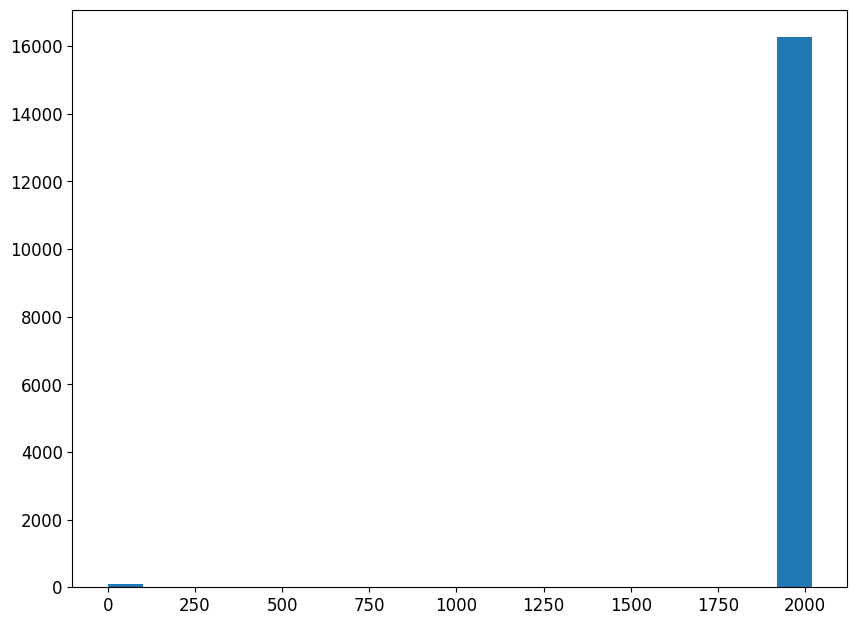

In [ ]:
plt.hist(games_clean.Year, bins = 20)

(1750.0, 2010.0)

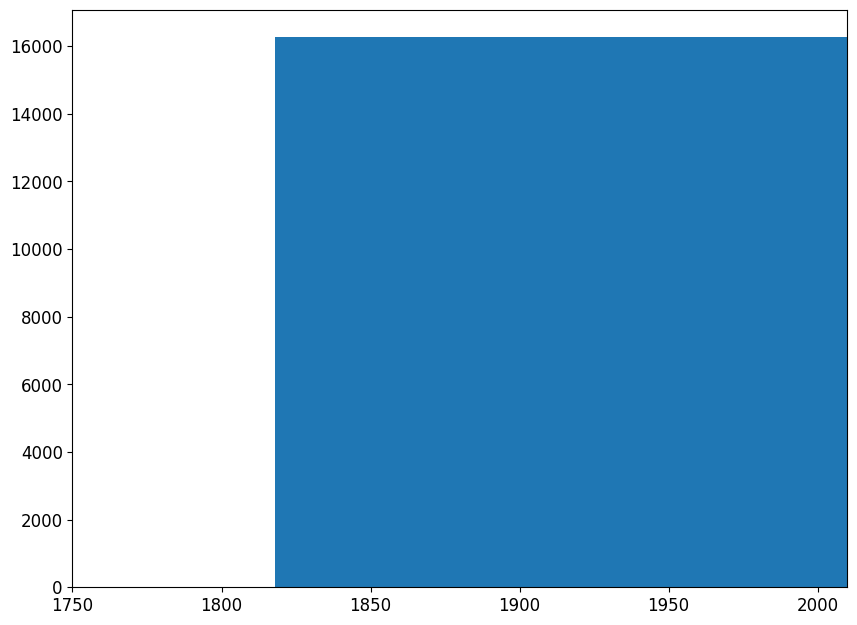

In [ ]:
plt.hist(games_clean.Year, bins = 10)
plt.xlim([1750, 2010])

In [ ]:
year_outlier = games_clean[games_clean.Year < 1980]
year_outlier.Year.describe()

count    101.000000
mean      20.326733
std       30.551304
min        0.000000
25%        6.000000
50%        9.000000
75%       14.000000
max       98.000000
Name: Year, dtype: float64

In [ ]:
year_outlier.Year.value_counts()
#1995 -> 95, 2001 -> 1 이렇게 표기된 듯하여 4자리 연도표기로 수정

9     10
11    10
8     10
6      8
10     7
3      7
16     5
15     5
5      4
4      4
95     4
0      3
2      3
96     3
7      3
98     3
14     2
97     2
13     2
1      2
12     2
86     1
94     1
Name: Year, dtype: int64

In [ ]:
for index, row in year_outlier.iterrows():
  if row.Year >= 80:
    games_clean.at[index,'Year'] = row.Year + 1900 
  else :
    games_clean.at[index,'Year'] = row.Year + 2000

(array([5.500e+01, 5.300e+01, 2.800e+01, 3.700e+01, 3.200e+01, 5.500e+01,
        8.600e+01, 3.100e+02, 5.480e+02, 7.130e+02, 8.300e+02, 1.625e+03,
        1.713e+03, 2.220e+03, 2.873e+03, 2.427e+03, 1.214e+03, 1.194e+03,
        3.470e+02, 1.000e+00]),
 array([1980., 1982., 1984., 1986., 1988., 1990., 1992., 1994., 1996.,
        1998., 2000., 2002., 2004., 2006., 2008., 2010., 2012., 2014.,
        2016., 2018., 2020.]),
 <BarContainer object of 20 artists>)

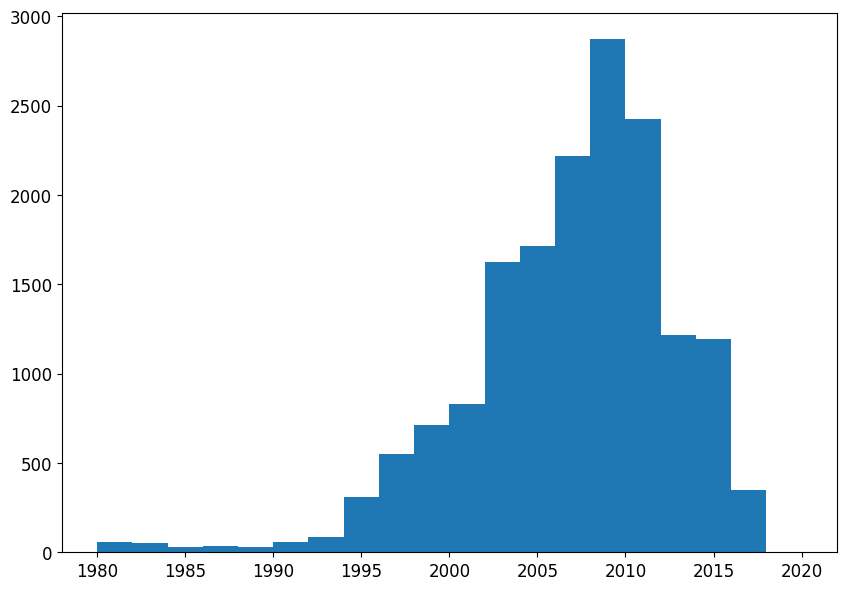

In [ ]:
#시각화
plt.figure(figsize = (10, 7))
plt.hist(games_clean.Year, bins = 20)

In [ ]:
#2017년부터 데이터가 현저히 줄어든다. 판매량도 유의미하지 않고, 불분명한 정보도 있어 모두 삭제하기로 한다
games_clean[games_clean.Year > 2016]

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
5254,Brothers Conflict: Precious Baby,PSV,2017,Action,0,0,0.01,0
6836,Imagine: Makeup Artist,DS,2020,Simulation,0.27,0K,0,0.02
10008,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,0,0,0.03,0
15065,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,0,0,0.01,0


In [ ]:
year_idx1 = games_clean[games_clean.Year > 2016].index
games_clean.drop(year_idx1, inplace=True)

In [ ]:
#1980년대 정보는 200개 정도있는데, 현재 상황에서 유의미하지 않을 것 같아 삭제한다
games_clean[games_clean.Year < 1990]

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
36,Beamrider,2600,1984,Racing,0.26,0.01,0,0
57,Bomberman,NES,1985,Puzzle,0.18,0,0.85,0
74,Wrecking Crew,NES,1985,Platform,0,0,0.51,0
153,Gegege no Kitarou 2: Youkai Gundan no Chousen,NES,1987,Role-Playing,0,0,1.25,0
207,Mountain King,2600,1982,Action,0.29,0.02,0,0
...,...,...,...,...,...,...,...,...
16085,Frogs And Flies,2600,1981,Action,0.33,0.02,0,0
16139,Polaris,2600,1982,Action,0.26,0.02,0,0
16185,Pitfall II: Lost Caverns,2600,1983,Platform,1.22,0.07,0,0.02
16215,Mega Man 2,NES,1988,Action,0.93,0.15,0.42,0.01


In [ ]:
year_idx2 = games_clean[games_clean.Year < 1990].index
games_clean.drop(year_idx2, inplace=True)

(array([  55.,   36.,   50.,  310.,  259.,  289.,  713.,  348.,  482.,
         842., 1548.,  948., 1018., 2641., 1434., 1271., 1821.,  549.,
         582.,  956.]),
 array([1990. , 1991.3, 1992.6, 1993.9, 1995.2, 1996.5, 1997.8, 1999.1,
        2000.4, 2001.7, 2003. , 2004.3, 2005.6, 2006.9, 2008.2, 2009.5,
        2010.8, 2012.1, 2013.4, 2014.7, 2016. ]),
 <BarContainer object of 20 artists>)

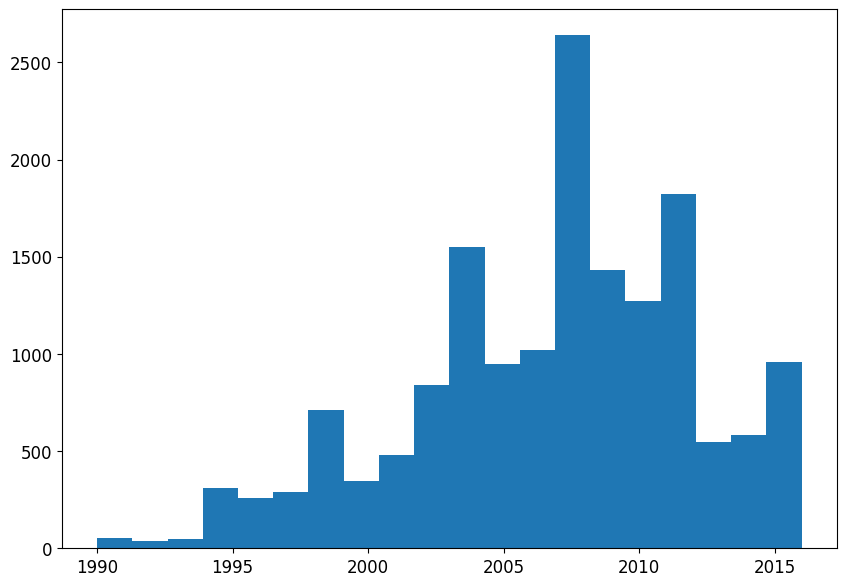

In [ ]:
#이상치 제거 확인
plt.figure(figsize = (10, 7))
plt.hist(games_clean.Year, bins = 20)

Genre 컬럼

In [ ]:
genre_pie = games_clean.Genre.value_counts(normalize=True)
genre_pie

Action          0.198861
Sports          0.142645
Misc            0.105807
Role-Playing    0.089710
Adventure       0.078318
Shooter         0.078318
Racing          0.075718
Simulation      0.052501
Platform        0.051634
Fighting        0.050830
Strategy        0.041543
Puzzle          0.034113
Name: Genre, dtype: float64

([<matplotlib.patches.Wedge at 0x7fdebf1bd0d0>,
 [Text(0.8922269897308847, 0.6433746954891558, 'Action'),
  Text(-0.13912280913152233, 1.0911667351873195, 'Sports'),
  Text(-0.8666622742307386, 0.6774190006378654, 'Misc'),
  Text(-1.0986684077355606, 0.05410850066124826, 'Role-Playing'),
  Text(-0.9763699638410654, -0.5066573730925039, 'Shooter'),
  Text(-0.6211416803973505, -0.9078452582203401, 'Adventure'),
  Text(-0.12744309458765718, -1.092592448098522, 'Racing'),
  Text(0.3110620486541486, -1.055102081263744, 'Platform'),
  Text(0.6336179895094374, -0.8991819856792165, 'Simulation'),
  Text(0.8855468972663424, -0.6525386522972828, 'Fighting'),
  Text(1.035237903731962, -0.371863526951291, 'Strategy'),
  Text(1.0936889233557874, -0.11766281880381259, 'Puzzle')])

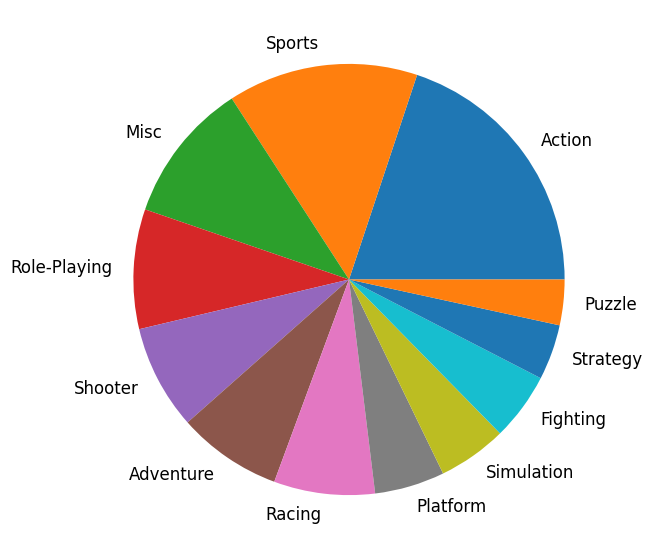

In [ ]:
genre_pie_label = ['Action', 'Sports', 'Misc', 'Role-Playing', 'Shooter', 'Adventure', 'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle']

plt.figure(figsize = (10, 7))
plt.pie(genre_pie, labels=genre_pie_label)

#####**Sales 컬럼**

In [ ]:
games_clean.NA_Sales.value_counts

<bound method IndexOpsMixin.value_counts of 0        0.04
1        0.17
2           0
3        0.04
4        0.12
         ... 
16414    0.15
16415    0.01
16416    0.44
16417    0.05
16418       0
Name: NA_Sales, Length: 16152, dtype: object>

In [ ]:
#M(백만)이 원래 단위임을 감안하여 다른 데이터와 같은 형식으로 만들어준다 

def sales_cleaning(column):
  item_list = []
  for item in column :
    if 'M' in item:
      item_list.append(item.replace('M',''))

    elif 'K' in item:
      if item == 'K':
        item_list.append(0)

      else :
        item = item.replace('K','')
        item = float(item)
        item_list.append(round(item * 0.001, 2))

    else :
      item_list.append(item)

  print(item_list)
  return item_list


In [ ]:
#네개 sales 컬럼에 모두 함수 적용

games_clean.NA_Sales = sales_cleaning(games_clean.NA_Sales)
games_clean.NA_Sales = games_clean.NA_Sales.astype('float')

games_clean.EU_Sales = sales_cleaning(games_clean.EU_Sales)
games_clean.EU_Sales = games_clean.EU_Sales.astype('float')

games_clean.JP_Sales = sales_cleaning(games_clean.JP_Sales)
games_clean.JP_Sales = games_clean.JP_Sales.astype('float')

games_clean.Other_Sales = sales_cleaning(games_clean.Other_Sales)
games_clean.Other_Sales = games_clean.Other_Sales.astype('float')

In [ ]:
#데이터 타입 변환 확인
games_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16152 entries, 0 to 16418
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16152 non-null  object 
 1   Platform     16152 non-null  object 
 2   Year         16152 non-null  int64  
 3   Genre        16152 non-null  object 
 4   NA_Sales     16152 non-null  float64
 5   EU_Sales     16152 non-null  float64
 6   JP_Sales     16152 non-null  float64
 7   Other_Sales  16152 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1.1+ MB


In [ ]:
games_clean

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...
16414,Ice Age 2: The Meltdown,GC,2006,Platform,0.15,0.04,0.00,0.01
16415,Rainbow Islands: Revolution,PSP,2005,Action,0.01,0.00,0.00,0.00
16416,NBA 2K16,PS3,2015,Sports,0.44,0.19,0.03,0.13
16417,Toukiden: The Age of Demons,PSV,2013,Action,0.05,0.05,0.25,0.03


In [ ]:
#sales 컬럼 outlier 확인
games_clean.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16152.000000,16152.000000,16152.000000,16152.000000,16152.000000
mean,2006.738484,0.253531,0.147244,0.072092,0.048401
std,5.216455,0.726062,0.507746,0.289151,0.189755
min,1990.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.230000,0.110000,0.030000,0.040000
max,2016.000000,41.490000,29.020000,10.220000,10.570000


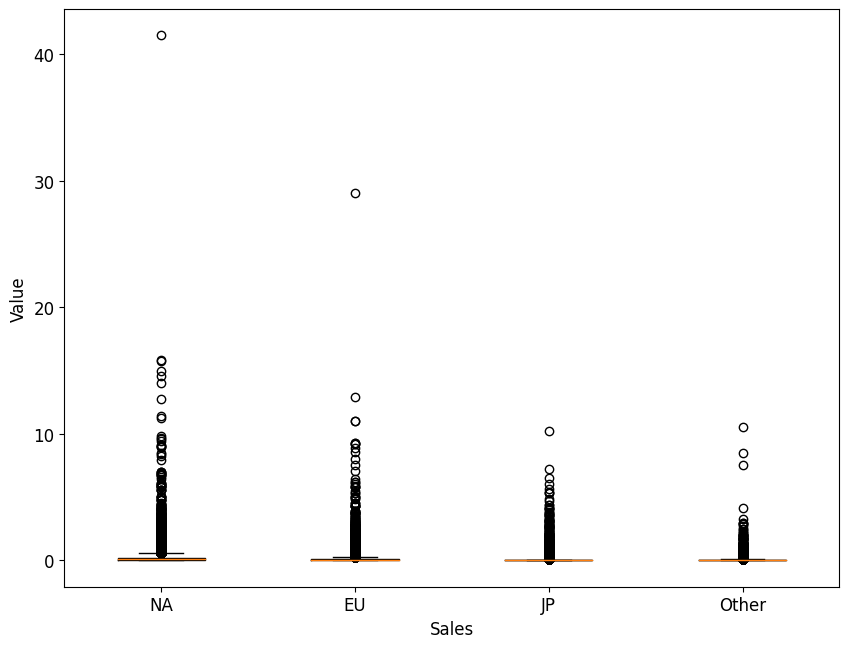

In [ ]:
#box plot으로 이상치 시각화
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 7.5)
plt.rcParams['font.size'] = 12

fig, ax = plt.subplots()

box_label = ['NA', 'EU', 'JP', 'Other']

ax.boxplot([games_clean.NA_Sales, games_clean.EU_Sales, games_clean.JP_Sales, games_clean.Other_Sales], labels=box_label)
ax.set_xlabel('Sales')
ax.set_ylabel('Value')

plt.show()

In [ ]:
#NA sales 컬럼에서 이상치 확인인
games_clean[games_clean.NA_Sales > 20]

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2884,Wii Sports,Wii,2006,Sports,41.49,29.02,3.77,8.46


In [ ]:
#EU sales 컬럼에서 이상치 확인인
games_clean[games_clean.EU_Sales > 20]

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2884,Wii Sports,Wii,2006,Sports,41.49,29.02,3.77,8.46


In [ ]:
games_clean.drop(index=2884, axis=0, inplace=True)

In [ ]:
games_clean.reset_index(drop=True, inplace=True)
games_clean

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...
16146,Ice Age 2: The Meltdown,GC,2006,Platform,0.15,0.04,0.00,0.01
16147,Rainbow Islands: Revolution,PSP,2005,Action,0.01,0.00,0.00,0.00
16148,NBA 2K16,PS3,2015,Sports,0.44,0.19,0.03,0.13
16149,Toukiden: The Age of Demons,PSV,2013,Action,0.05,0.05,0.25,0.03


####**1-4 Feature Engineering**

#####Total_Sales 컬럼 생성

In [ ]:
def total_sales(df):
  total_sum = []
  for index, row in df.iterrows():
    sum = row['NA_Sales'] + row['EU_Sales'] + row['JP_Sales'] + row['Other_Sales']
    total_sum.append(sum)
  return total_sum

games_clean['Total_Sales'] = total_sales(games_clean)

In [ ]:
games_clean

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...
16146,Ice Age 2: The Meltdown,GC,2006,Platform,0.15,0.04,0.00,0.01,0.20
16147,Rainbow Islands: Revolution,PSP,2005,Action,0.01,0.00,0.00,0.00,0.01
16148,NBA 2K16,PS3,2015,Sports,0.44,0.19,0.03,0.13,0.79
16149,Toukiden: The Age of Demons,PSV,2013,Action,0.05,0.05,0.25,0.03,0.38


#####Times 컬럼 생성 

In [ ]:
#시대별로 게임 트렌드를 비교하기 위해 1990s, 2000s, 2010s로 데이터를 나눈다

year10 = []

for i in games_clean.Year:
  if i < 2000:
    year10.append('1990s')
  elif i >= 2010:
    year10.append('2010s')
  else:
    year10.append('2000s')

print(year10)

In [ ]:
games_clean['Times'] = year10

####**1-5 전체 컬럼 중복치 확인**

In [ ]:
games_clean.duplicated().sum()

0

In [ ]:
games_clean.shape

(16151, 10)

#**2. 데이터 분석 및 시각화**

#### **2-1. 비디오게임 시장 연도별 매출 변화**

In [ ]:
year_sales = games_clean.groupby('Year')[['Total_Sales']].sum()
year_sales

,Total_Sales
Year,
1990,46.77
1991,27.90
1992,63.46
1993,43.63
1994,69.91
1995,87.54
1996,198.60
1997,201.07
1998,255.17


([<matplotlib.axis.XTick at 0x7fdebf305850>,
 [Text(0, 0, '1990'),
  Text(1, 0, '1991'),
  Text(2, 0, '1992'),
  Text(3, 0, '1993'),
  Text(4, 0, '1994'),
  Text(5, 0, '1995'),
  Text(6, 0, '1996'),
  Text(7, 0, '1997'),
  Text(8, 0, '1998'),
  Text(9, 0, '1999'),
  Text(10, 0, '2000'),
  Text(11, 0, '2001'),
  Text(12, 0, '2002'),
  Text(13, 0, '2003'),
  Text(14, 0, '2004'),
  Text(15, 0, '2005'),
  Text(16, 0, '2006'),
  Text(17, 0, '2007'),
  Text(18, 0, '2008'),
  Text(19, 0, '2009'),
  Text(20, 0, '2010'),
  Text(21, 0, '2011'),
  Text(22, 0, '2012'),
  Text(23, 0, '2013'),
  Text(24, 0, '2014'),
  Text(25, 0, '2015'),
  Text(26, 0, '2016')])

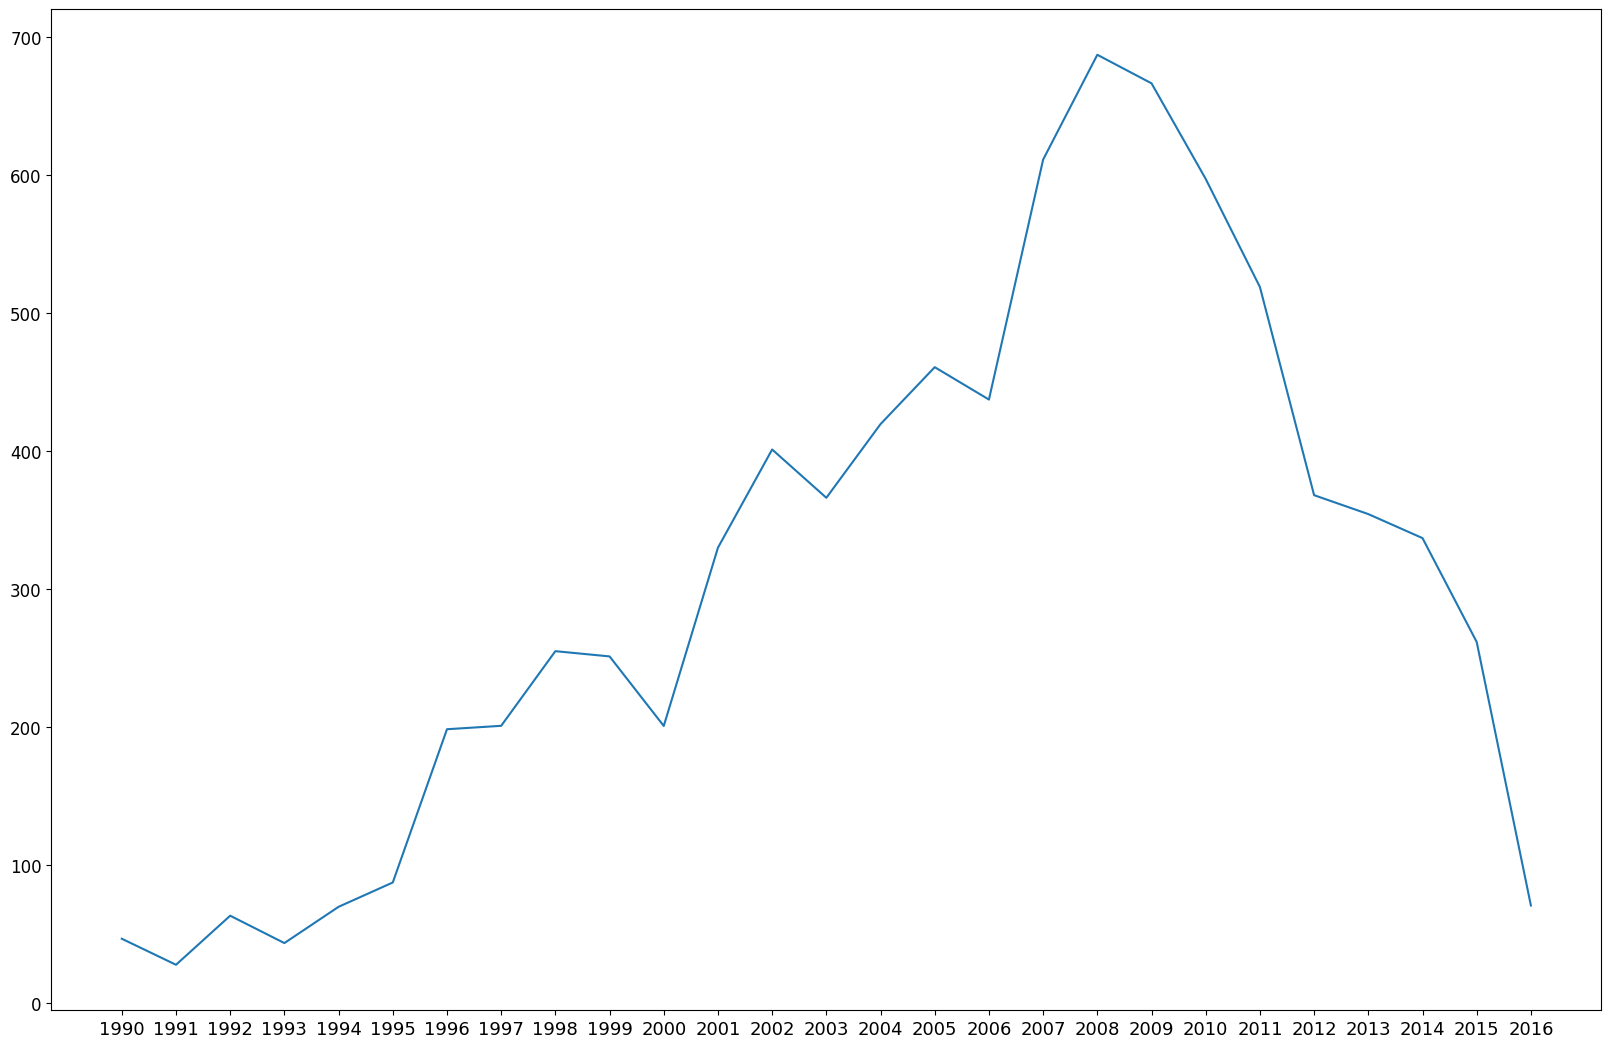

In [ ]:
#꺾은선 그래프 시각화
labels = year_sales.index
index = np.arange(len(labels))

plt.figure(figsize = (20, 13))
plt.plot(index, year_sales)
plt.xticks(index, labels, fontsize=13)



* 2010년대부터 매출이 하락세를 보이는 결과를 얻었다
* 하지만 뉴스에 따르면 비디오 게임 시장은 꾸준한 성장세
* 자료의 양이 2000년대에 집중되어 있어 매출액으로는 정확한 비교가 어렵다는 것을 알 수 있다



#### **2-2. 지역별 시장 규모 비교**

In [ ]:
games_2010 = games_clean[games_clean.Year >= 2010]
games_2010_sum = games_2010[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
games_2010_sum

NA_Sales       1111.71
EU_Sales        835.89
JP_Sales        291.81
Other_Sales     269.55
dtype: float64

In [ ]:
games_2010_sum[1] / games_2010_sum.sum()

0.3331619475798737

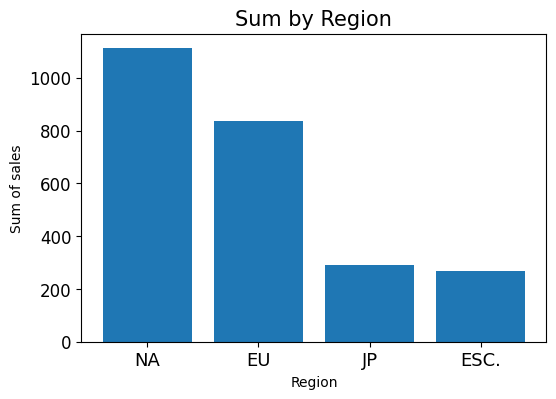

In [ ]:
label = ['NA', 'EU', 'JP', 'ESC.']
index = np.arange(len(label))

plt.figure(figsize = (6, 4))
plt.bar(index, games_2010_sum)
plt.title('Sum by Region', fontsize=15)
plt.xlabel('Region', fontsize=10)
plt.ylabel('Sum of sales', fontsize=10)
plt.xticks(index, label, fontsize=13)
plt.show()

*   북미와 유럽 시장이 타지역에 비해 압도적으로 크다는 것을 알 수 있다.
*   타깃 시장을 북미-유럽으로 설정한다.


#### **2-3. 장르별 매출액 비교**

In [ ]:
genre_sale = games_clean.groupby('Genre').sum()
genre_sale.drop(columns='Year', inplace=True)
genre_sale

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,
Action,830.25,517.06,148.05,185.68,1681.04
Adventure,99.35,63.23,49.82,16.62,229.02
Fighting,213.93,98.29,82.27,35.96,430.45
Misc,399.32,210.77,100.22,73.00,783.31
Platform,359.40,184.16,97.18,48.62,689.36
Puzzle,78.48,45.10,43.75,11.33,178.66
Racing,350.46,235.47,52.31,76.70,714.94
Role-Playing,317.78,183.16,329.12,55.28,885.34
Shooter,529.87,310.06,32.75,101.79,974.47


#####북미 (NA)

In [ ]:
#장르별 매출 비교
genre_sale_na = genre_sale['NA_Sales']
genre_sale_na = genre_sale_na.sort_values(ascending=False)
genre_sale_na

Genre
Action          830.25
Sports          625.26
Shooter         529.87
Misc            399.32
Platform        359.40
Racing          350.46
Role-Playing    317.78
Fighting        213.93
Simulation      181.19
Adventure        99.35
Puzzle           78.48
Strategy         68.26
Name: NA_Sales, dtype: float64

([<matplotlib.patches.Wedge at 0x7fdeb9b0f6d0>,
 [Text(0.8800254938297893, 0.6599660068591682, 'Action'),
  Text(-0.21931160287783946, 1.0779157763216722, 'Sports'),
  Text(-0.9783098707698713, 0.5029013787555549, 'Shooter'),
  Text(-1.0670661832128019, -0.2671511943519308, 'Misc'),
  Text(-0.7396455996303842, -0.8142016868979145, 'Platform'),
  Text(-0.20482300044771887, -1.0807624801442701, 'Racing'),
  Text(0.35707704902500875, -1.0404306709529432, 'Role-Playing'),
  Text(0.7439011003942105, -0.8103154650087107, 'Fighting'),
  Text(0.9535735044835882, -0.5483589805473128, 'Simulation'),
  Text(1.0494124468329928, -0.32974765568839315, 'Adventure'),
  Text(1.0847642595119387, -0.18244588591008407, 'Puzzle'),
  Text(1.0984610525822507, -0.058166278546026615, 'Strategy')])

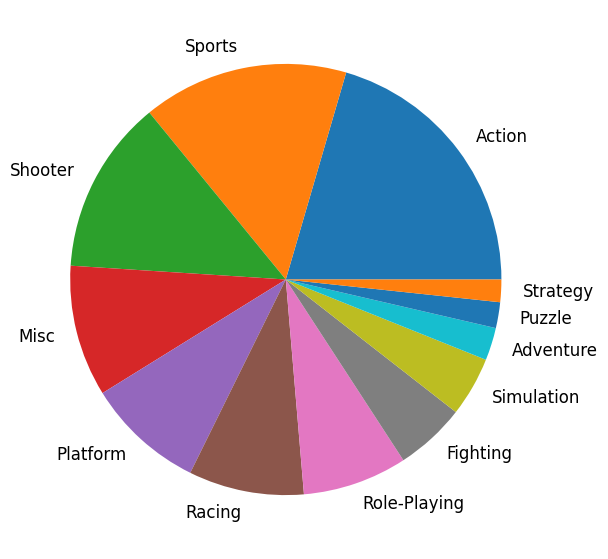

In [ ]:
genre_pie_label = genre_sale_na.index
plt.figure(figsize = (10, 7))
plt.pie(genre_sale_na, labels = genre_pie_label)

######시대별 장르 선호도 변화

In [ ]:
#2000년대, 2010년대 북미지역 장르별 매출비중 비교
time_2010 = games_clean[games_clean.Times == '2010s']
time_2000 = games_clean[games_clean.Times == '2000s']

In [ ]:
genre_na_2010 = time_2010.groupby('Genre')['NA_Sales'].sum()
genre_na_2010 = genre_na_2010.sort_values(ascending=False)
genre_na_2010 = genre_na_2010.div(genre_na_2010.sum(), axis=0)
genre_na_2010

Genre
Action          0.261309
Shooter         0.205683
Sports          0.139551
Misc            0.111594
Role-Playing    0.092110
Platform        0.049896
Racing          0.041036
Fighting        0.035036
Simulation      0.024017
Adventure       0.018566
Strategy        0.012233
Puzzle          0.008968
Name: NA_Sales, dtype: float64

In [ ]:
genre_na_2000 = time_2000.groupby('Genre')['NA_Sales'].sum()
genre_na_2000 = genre_na_2000.sort_values(ascending=False)
genre_na_2000 = genre_na_2000.div(genre_na_2000.sum(), axis=0)
genre_na_2000

Genre
Action          0.196466
Sports          0.168625
Shooter         0.109055
Misc            0.102464
Racing          0.095512
Platform        0.085164
Role-Playing    0.070995
Simulation      0.057310
Fighting        0.051469
Adventure       0.025955
Puzzle          0.023154
Strategy        0.013833
Name: NA_Sales, dtype: float64

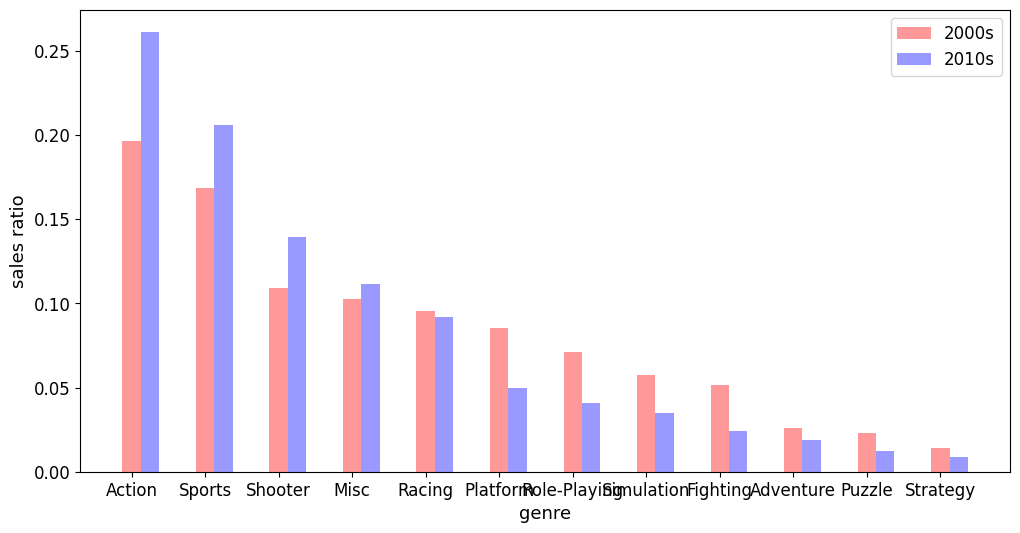

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
bar_width = 0.25

label = genre_na_2000.index
index = np.arange(len(label))

b1 = plt.bar(index, genre_na_2000, bar_width, alpha=0.4, color='red', label='2000s')
b2 = plt.bar(index + bar_width, genre_na_2010, bar_width, alpha=0.4, color='blue', label='2010s')

plt.xticks(index, label)

# x축, y축 이름 및 범례 설정
plt.xlabel('genre', size = 13)
plt.ylabel('sales ratio', size = 13)
plt.legend()
plt.show()

* Action, Sports, Shooter 장르의 비중이 많이 늘었음을 알 수 있다

#####유럽 (EU)

In [ ]:
#장르별 매출 비교
genre_sale_eu = genre_sale['EU_Sales']
genre_sale_eu = genre_sale_eu.sort_values(ascending=False)
genre_sale_eu

Genre
Action          517.06
Sports          343.66
Shooter         310.06
Racing          235.47
Misc            210.77
Platform        184.16
Role-Playing    183.16
Simulation      113.16
Fighting         98.29
Adventure        63.23
Strategy         45.15
Puzzle           45.10
Name: EU_Sales, dtype: float64

([<matplotlib.patches.Wedge at 0x7fdebeee3220>,
 [Text(0.8473576761554497, 0.7014164017617753, 'Action'),
  Text(-0.29516233625841276, 1.0596599432150278, 'Sports'),
  Text(-1.0021688544600902, 0.45349485901182013, 'Shooter'),
  Text(-1.0493719004568696, -0.3298766656366253, 'Racing'),
  Text(-0.682636853177627, -0.8625583613204079, 'Misc'),
  Text(-0.15497364533541927, -1.0890285438185043, 'Platform'),
  Text(0.37703070133353034, -1.0333672388129722, 'Role-Playing'),
  Text(0.7466628980854206, -0.8077713269376927, 'Simulation'),
  Text(0.9423886011670322, -0.5673656002882485, 'Fighting'),
  Text(1.0420882967548066, -0.35221013864831613, 'Adventure'),
  Text(1.082030880125854, -0.19801306637207008, 'Strategy'),
  Text(1.0980000598610575, -0.06630134648039987, 'Puzzle')])

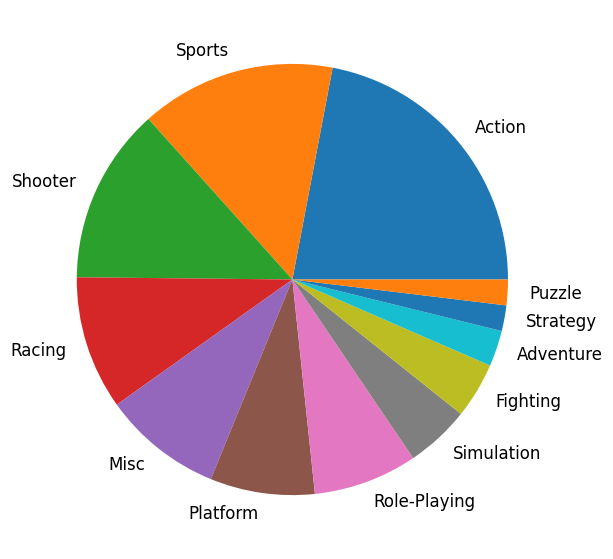

In [ ]:
genre_pie_label = genre_sale_eu.index
plt.figure(figsize = (10, 7))
plt.pie(genre_sale_eu, labels = genre_pie_label)

######시대별 장르 선호도 변화

In [ ]:
#2000년대, 2010년대 유럽지역 장르별 매출비중 비교
genre_eu_2010 = time_2010.groupby('Genre')['EU_Sales'].sum()
genre_eu_2010 = genre_eu_2010.sort_values(ascending=False)
genre_eu_2010 = genre_eu_2010.div(genre_eu_2010.sum(), axis=0)
genre_eu_2010

Genre
Action          0.285707
Shooter         0.200457
Sports          0.138679
Role-Playing    0.083396
Misc            0.077678
Racing          0.066420
Platform        0.046286
Simulation      0.030399
Fighting        0.024967
Adventure       0.022838
Strategy        0.015038
Puzzle          0.008135
Name: EU_Sales, dtype: float64

In [ ]:
genre_eu_2000 = time_2000.groupby('Genre')['EU_Sales'].sum()
genre_eu_2000 = genre_eu_2000.sort_values(ascending=False)
genre_eu_2000 = genre_eu_2000.div(genre_eu_2000.sum(), axis=0)
genre_eu_2000

Genre
Action          0.192923
Sports          0.160809
Racing          0.112619
Misc            0.106824
Shooter         0.100786
Platform        0.083302
Role-Playing    0.065730
Simulation      0.063992
Fighting        0.044310
Puzzle          0.027239
Adventure       0.025025
Strategy        0.016441
Name: EU_Sales, dtype: float64

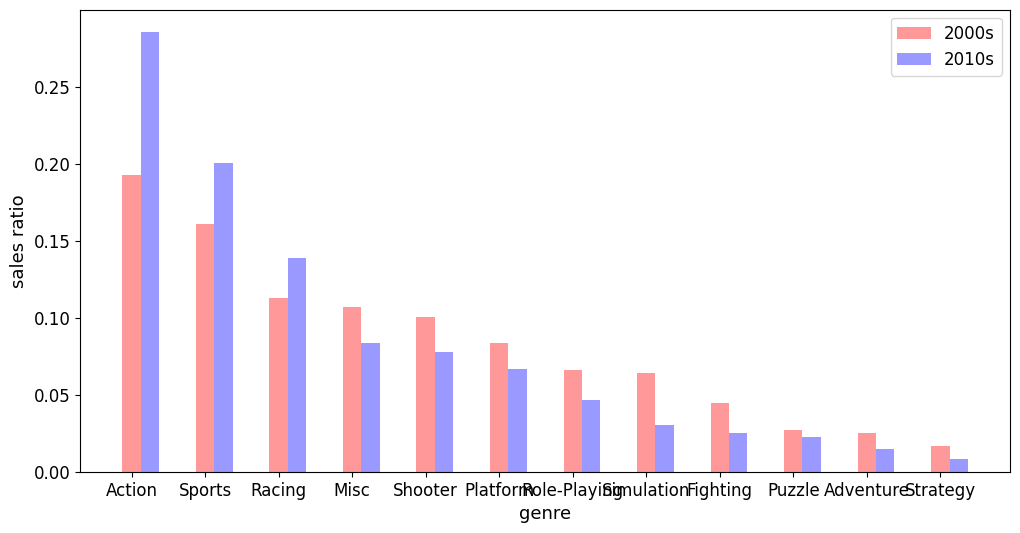

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
bar_width = 0.25

label = genre_eu_2000.index
index = np.arange(len(label))

b1 = plt.bar(index, genre_eu_2000, bar_width, alpha=0.4, color='red', label='2000s')
b2 = plt.bar(index + bar_width, genre_eu_2010, bar_width, alpha=0.4, color='blue', label='2010s')

plt.xticks(index, label)

# x축, y축 이름 및 범례 설정
plt.xlabel('genre', size = 13)
plt.ylabel('sales ratio', size = 13)
plt.legend()
plt.show()

* Action, Sports, Racing 장르의 비중이 늘었음을 알 수 있다

####**2-4. 플랫폼별 매출액 비교**

In [ ]:
plat_sales = games_clean.groupby('Platform').sum()
plat_sales.drop(columns = 'Year', inplace=True)
plat_sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Platform,,,,,
2600,2.36,0.14,0.00,0.03,2.53
3DS,73.32,54.45,92.98,11.82,232.57
DC,5.43,1.69,8.56,0.27,15.95
DS,388.81,194.46,174.95,60.35,818.57
GB,73.01,39.68,68.61,6.73,188.03
GBA,184.56,74.76,46.56,7.62,313.50
GC,133.23,38.66,20.90,5.16,197.95
N64,138.52,40.72,33.76,4.32,217.32
NES,11.69,2.69,12.69,0.47,27.54


In [ ]:
plat_pie = plat_sales['Total_Sales'].sort_values(ascending=False)

([<matplotlib.patches.Wedge at 0x7fdeb8bbc3d0>,
 [Text(0.9824744615390613, 0.49471601189321923, 'PS2'),
  Text(0.29395214815077886, 1.0599962898980084, 'X360'),
  Text(-0.48390717726864074, 0.9878430258841212, 'PS3'),
  Text(-0.9935058396204055, 0.47217173426641446, 'Wii'),
  Text(-1.0826693081552394, -0.19449207998953438, 'DS'),
  Text(-0.797716132658861, -0.7573961788230719, 'PS'),
  Text(-0.44845261482762433, -1.0044352902274325, 'GBA'),
  Text(-0.20845521657455096, -1.080067786151803, 'PSP'),
  Text(0.02681041194264682, -1.0996732250134427, 'PS4'),
  Text(0.2456660130685321, -1.0722164940080954, 'PC'),
  Text(0.4474379138687209, -1.004887711753312, 'XB'),
  Text(0.6240781911244105, -0.9058291292307198, '3DS'),
  Text(0.7679655164452702, -0.7875461672504981, 'N64'),
  Text(0.8818389399709283, -0.657540937091334, 'SNES'),
  Text(0.9701863380140935, -0.518399912741894, 'GC'),
  Text(1.035077878972353, -0.3723087219796161, 'GB'),
  Text(1.0731851292427972, -0.24139941667725898, 'XOne')

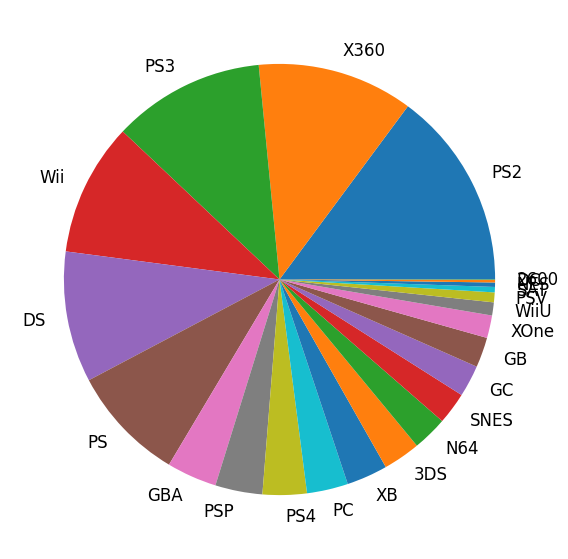

In [ ]:
plat_pie_label = plat_pie.index
plt.figure(figsize = (10, 7))
plt.pie(plat_pie, labels = plat_pie_label)

######시대별 플랫폼 선호도 변화

In [ ]:
plat_2000 = time_2000.groupby('Platform').sum()
plat_2000.drop(columns = 'Year', inplace=True)
plat_2000['2000_Sum'] = plat_2000['Total_Sales']
plat_2000

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,2000_Sum
Platform,,,,,,
3DS,0.00,0.00,0.02,0.00,0.02,0.02
DC,2.53,0.79,3.96,0.13,7.41,7.41
DS,325.40,163.76,147.10,51.69,687.95,687.95
GB,9.12,5.19,13.01,1.68,29.00,29.00
GBA,184.56,74.76,46.56,7.62,313.50,313.50
GC,133.23,38.66,20.90,5.16,197.95,197.95
N64,21.88,6.13,8.54,1.08,37.63,37.63
PC,24.79,52.52,0.08,7.16,84.55,84.55
PS,65.69,46.92,20.10,7.95,140.66,140.66


In [ ]:
plat_2010 = time_2010.groupby('Platform').sum()
plat_2010.drop(columns = 'Year', inplace=True)
plat_2010['2010_Sum'] = plat_2010['Total_Sales']
plat_2010

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,2010_Sum
Platform,,,,,,
3DS,73.32,54.45,92.96,11.82,232.55,232.55
DS,63.41,30.70,27.85,8.66,130.62,130.62
PC,38.83,67.84,0.00,16.08,122.75,122.75
PS2,2.79,2.03,0.78,1.42,7.02,7.02
PS3,229.33,225.52,59.13,91.34,605.32,605.32
PS4,95.80,122.94,14.01,43.00,275.75,275.75
PSP,9.68,7.97,42.35,4.78,64.78,64.78
PSV,16.07,16.27,20.87,8.41,61.62,61.62
Wii,126.30,66.10,15.26,18.36,226.02,226.02


In [ ]:
platratio_2000 = plat_2000['2000_Sum'].div(plat_2000['2000_Sum'].sum(), axis=0)
platratio_2000= platratio_2000.sort_values(ascending=False)
print(platratio_2000)

platratio_2010 = plat_2010['2010_Sum'].div(plat_2010['2010_Sum'].sum(), axis=0)
platratio_2010= platratio_2010.sort_values(ascending=False)
print(platratio_2010)

Platform
PS2     0.268605
DS      0.150128
Wii     0.131900
X360    0.090592
PS3     0.075624
GBA     0.068414
XB      0.056016
PSP     0.050214
GC      0.043198
PS      0.030696
PC      0.018451
N64     0.008212
GB      0.006329
DC      0.001617
3DS     0.000004
Name: 2000_Sum, dtype: float64
Platform
PS3     0.241263
X360    0.223057
PS4     0.109906
3DS     0.092688
Wii     0.090085
XOne    0.056238
DS      0.052061
PC      0.048925
WiiU    0.032599
PSP     0.025819
PSV     0.024560
PS2     0.002798
Name: 2010_Sum, dtype: float64


In [ ]:
plat_change = pd.merge(platratio_2000, platratio_2010, how='outer', on='Platform')

In [ ]:
plat_change.fillna(0)

,2000_Sum,2010_Sum
Platform,,
PS2,0.268605,0.002798
DS,0.150128,0.052061
Wii,0.131900,0.090085
X360,0.090592,0.223057
PS3,0.075624,0.241263
GBA,0.068414,0.000000
XB,0.056016,0.000000
PSP,0.050214,0.025819
GC,0.043198,0.000000


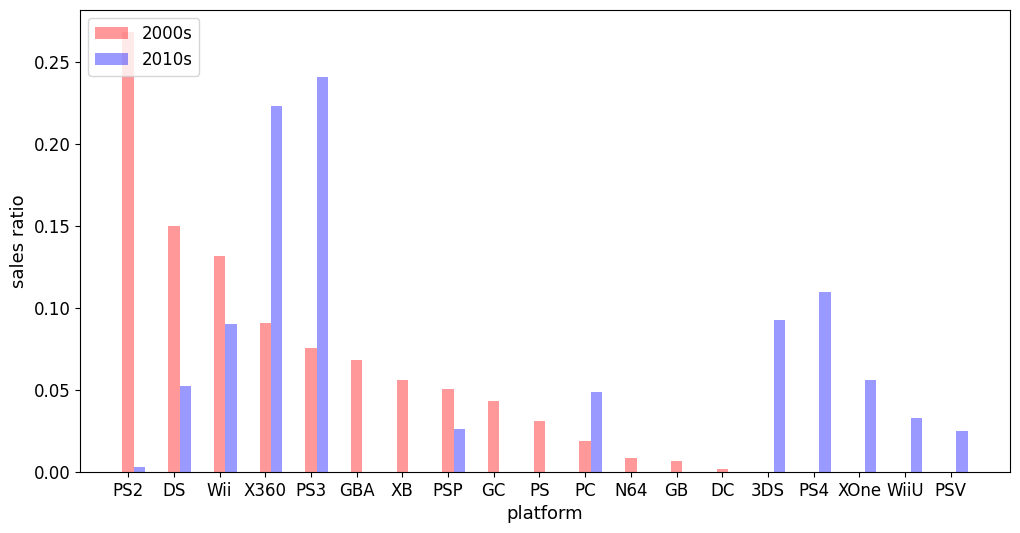

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
bar_width = 0.25

label = plat_change.index
index = np.arange(len(label))

b1 = plt.bar(index, plat_change['2000_Sum'], bar_width, alpha=0.4, color='red', label='2000s')
b2 = plt.bar(index + bar_width, plat_change['2010_Sum'], bar_width, alpha=0.4, color='blue', label='2010s')

plt.xticks(index, label)

# x축, y축 이름 및 범례 설정
plt.xlabel('platform', size = 13)
plt.ylabel('sales ratio', size = 13)
plt.legend()
plt.show()



* PS2는 전체 데이터에서 보면 플랫폼별 매출액 1위지만, 2010년에 들어 매출액이 급락했다
* 2010년대에는 X360, PS3, PS4, Wii 게임의 매출액이 두드러진다
* PS4은 2013년에 나온 제품으로, 보급률이 점점 높아질 것으로 보인다




####**2-5. 플랫폼별 장르 분석**

*   2010년대 선호 플랫폼인 PS3, X360, PS4, Wii
*   플랫폼 별로 선호되는 장르가 있는 분석해본다
*   2010년대 데이터만 분석한다

#####PS3

In [ ]:
ps3 = time_2010[time_2010.Platform == 'PS3']
ps3

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Times
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,0.12,0.09,0.00,0.04,0.25,2010s
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,0.04,0.03,0.00,0.01,0.08,2010s
17,Hajime no Ippo: The Fighting! (2014),PS3,2014,Sports,0.00,0.00,0.03,0.00,0.03,2010s
24,Injustice: Gods Among Us,PS3,2013,Fighting,0.48,0.53,0.01,0.23,1.25,2010s
43,Resident Evil: Revelations 2,PS3,2015,Action,0.06,0.08,0.16,0.03,0.33,2010s
...,...,...,...,...,...,...,...,...,...,...
16114,The Voice,PS3,2014,Action,0.02,0.00,0.00,0.00,0.02,2010s
16120,Yakuza,PS3,2012,Action,0.00,0.00,0.11,0.00,0.11,2010s
16141,MindJack,PS3,2011,Shooter,0.07,0.08,0.00,0.03,0.18,2010s
16143,White Album: Tsuzurareru Fuyu no Omoide,PS3,2010,Adventure,0.00,0.00,0.05,0.00,0.05,2010s


In [ ]:
ps3.Genre.value_counts()

Action          279
Sports          127
Shooter          98
Role-Playing     94
Misc             72
Adventure        61
Fighting         56
Racing           49
Platform         22
Simulation       20
Strategy         16
Puzzle            2
Name: Genre, dtype: int64

In [ ]:
ps3_sum = ps3.groupby('Genre').sum()
ps3_sum.drop(columns='Year', inplace=True)
ps3_sum[(ps3_sum.NA_Sales > 50) & (ps3_sum.EU_Sales > 50)]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,
Action,75.11,77.23,21.65,31.66,205.65
Shooter,51.98,52.23,7.27,20.11,131.59


#####x360

In [ ]:
x360 = time_2010[time_2010.Platform == 'X360']
x360.Genre.value_counts()

Action          192
Sports          111
Shooter         111
Misc             75
Racing           53
Fighting         40
Role-Playing     37
Adventure        34
Simulation       20
Platform         10
Strategy          9
Puzzle            1
Name: Genre, dtype: int64

In [ ]:
x360_sum = x360.groupby('Genre').sum()
x360_sum.drop(columns='Year', inplace=True)
x360_sum[(x360_sum.NA_Sales > 50) & (x360_sum.EU_Sales > 50)]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,
Action,83.04,50.22,1.44,12.84,147.54


#####PS4

In [ ]:
ps4 = time_2010[time_2010.Platform == 'PS4']
ps4.Genre.value_counts()

Action          121
Role-Playing     46
Sports           43
Shooter          34
Adventure        19
Racing           17
Fighting         17
Misc             15
Platform         11
Simulation        5
Strategy          5
Puzzle            1
Name: Genre, dtype: int64

In [ ]:
ps4_sum = ps4.groupby('Genre').sum()
ps4_sum.drop(columns='Year', inplace=True)
ps4_sum[(ps4_sum.NA_Sales > 20) & (ps4_sum.EU_Sales > 20)]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,
Action,28.70,37.43,5.15,13.42,84.70
Shooter,28.02,33.15,2.33,11.82,75.32


#####Wii

In [ ]:
wii = time_2010[time_2010.Platform == 'Wii']
wii.Genre.value_counts()

Misc            130
Sports           95
Action           92
Racing           25
Adventure        21
Platform         20
Shooter          19
Simulation       15
Role-Playing     11
Strategy         10
Puzzle           10
Fighting          8
Name: Genre, dtype: int64

In [ ]:
wii_sum = wii.groupby('Genre').sum()
wii_sum.drop(columns='Year', inplace=True)
wii_sum[(wii_sum.NA_Sales > 20) & (wii_sum.EU_Sales > 20)]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,
Misc,46.71,24.69,3.41,6.85,81.66




*   PS3, X360, PS4 게임은 Action, Shooter 장르가 가장 매출이 높았다
* Wii 게임은 Misc 장르가 매출액 1위였는데, Wii 플랫폼 자체의 특수성으로 보아야할 것이다



####**2-6. 북미-유럽에서 동시에 인기를 끌었던 게임 분석**

* 타겟 시장을 북미-유럽으로 잡았기 때문에 두 지역 모두에서 높은 매출액을 보였던 게임들을 찾아본다.
* 2010년대 데이터만을 이용한다
* 해당 게임들의 특성을 찾아본다
* K-means 클러스터링 방법을 이용한다



In [ ]:
df = time_2010[['NA_Sales', 'EU_Sales']]

In [ ]:
#클러스터 갯수는 4개로 지정
kmeans = KMeans(n_clusters=4, max_iter=50, random_state=42)
kmeans.fit(df)

#데이터셋에 클러스터 컬럼 만들기
cluster_labels = kmeans.labels_
df_k4 = df.assign(Cluster = cluster_labels)
df_k4

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,NA_Sales,EU_Sales,Cluster
2,0.00,0.00,0
3,0.04,0.00,0
4,0.12,0.09,0
6,0.02,0.01,0
9,0.04,0.03,0
...,...,...,...
16134,0.13,0.12,0
16141,0.07,0.08,0
16143,0.00,0.00,0
16148,0.44,0.19,0


<AxesSubplot:xlabel='NA_Sales', ylabel='EU_Sales'>

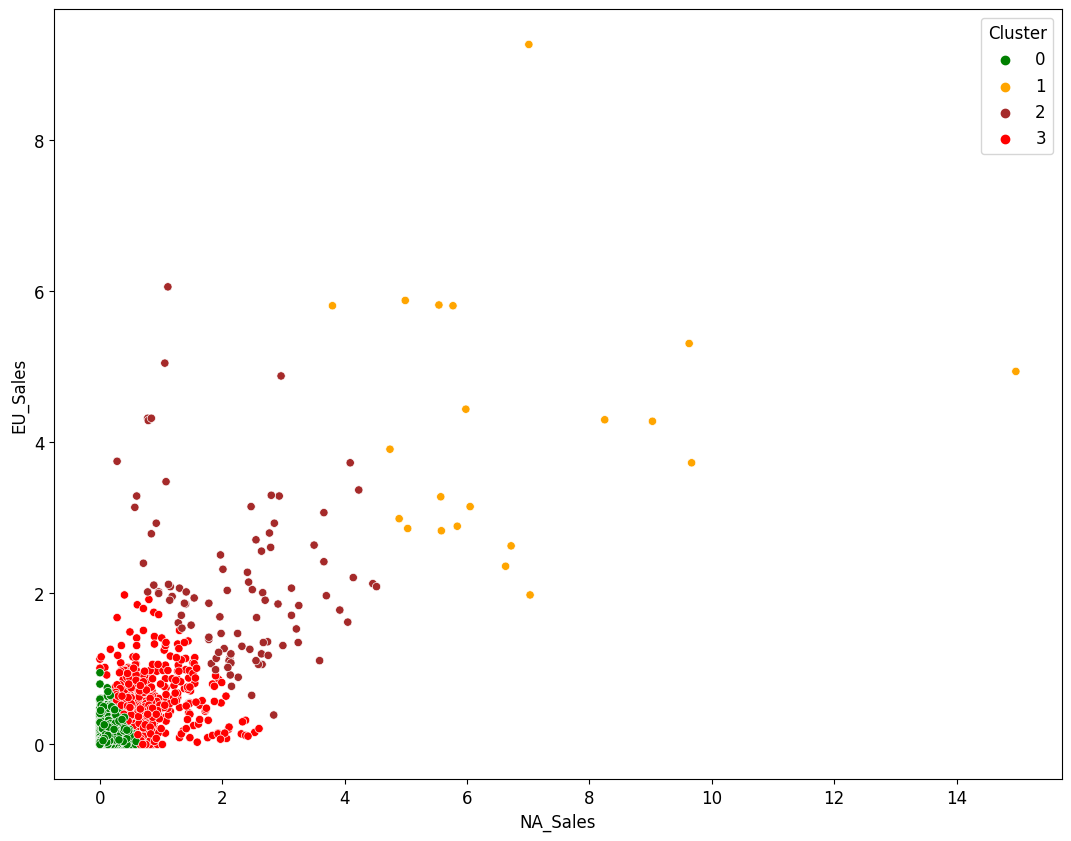

In [ ]:
plt.figure(figsize = (13,10))
sns.scatterplot(x = df_k4.NA_Sales, y= df_k4.EU_Sales, hue = df_k4.Cluster, palette=['green','orange','brown','red'])

In [ ]:
#cluster1 게임들의 특성을 살펴보자
time_2010['Cluster'] = df_k4['Cluster']
cluster1 = time_2010[time_2010.Cluster == 1]
cluster1

<ipython-input-193-c2ce3008e3ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_2010['Cluster'] = df_k4['Cluster']


,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Times,Cluster
215,Just Dance 3,Wii,2011,Misc,6.05,3.15,0.00,1.07,10.27,2010s,1
1959,Grand Theft Auto V,PS4,2014,Action,3.80,5.81,0.36,2.02,11.99,2010s,1
2738,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.03,4.28,0.13,1.32,14.76,2010s,1
3392,Grand Theft Auto V,PS3,2013,Action,7.01,9.27,0.97,4.14,21.39,2010s,1
4128,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.88,0.65,2.52,14.04,2010s,1
4229,Kinect Adventures!,X360,2010,Misc,14.97,4.94,0.24,1.67,21.82,2010s,1
5459,Call of Duty: Ghosts,X360,2013,Shooter,6.72,2.63,0.04,0.82,10.21,2010s,1
6084,Call of Duty: Black Ops,X360,2010,Shooter,9.67,3.73,0.11,1.13,14.64,2010s,1
6222,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.30,0.07,1.12,13.74,2010s,1
8841,Call of Duty: Black Ops 3,PS4,2015,Shooter,5.77,5.81,0.35,2.31,14.24,2010s,1


In [ ]:
cluster1.Platform.value_counts()

X360    10
PS3      4
Wii      2
PS4      2
3DS      2
DS       1
Name: Platform, dtype: int64

In [ ]:
cluster1.Genre.value_counts()

Shooter         10
Misc             4
Action           3
Role-Playing     2
Racing           1
Platform         1
Name: Genre, dtype: int64

# **3. 결론 : 다음 분기에는 어떤 게임을 설계해야 하는가**



* PS3,4와 X360 플랫폼 게임을 기획할 예정이다.
* Action과 Shooer 중 어떤 장르가 매출에 유리할까?
* 가설 검정과 표본정규분포에 따라 결정
* 이 역시 2010년대 자료만을 사용한다



In [ ]:
#조건에 맞는 데이터프레임을 다시 만들어보자
abtest = time_2010[(time_2010.Platform == 'PS3') | (time_2010.Platform == 'PS4') | (time_2010.Platform == 'X360')]
abtest

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Times,Cluster
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,0.12,0.09,0.00,0.04,0.25,2010s,0
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,0.04,0.03,0.00,0.01,0.08,2010s,0
17,Hajime no Ippo: The Fighting! (2014),PS3,2014,Sports,0.00,0.00,0.03,0.00,0.03,2010s,0
18,Grand Kingdom,PS4,2015,Role-Playing,0.02,0.00,0.03,0.00,0.05,2010s,0
23,Don Bradman Cricket 14,X360,2014,Sports,0.00,0.01,0.00,0.00,0.01,2010s,0
...,...,...,...,...,...,...,...,...,...,...,...
16124,Koihime Enbu,PS4,2016,Fighting,0.00,0.00,0.02,0.00,0.02,2010s,0
16129,Yoru no Nai Kuni,PS4,2015,Role-Playing,0.00,0.00,0.08,0.00,0.08,2010s,0
16141,MindJack,PS3,2011,Shooter,0.07,0.08,0.00,0.03,0.18,2010s,0
16143,White Album: Tsuzurareru Fuyu no Omoide,PS3,2010,Adventure,0.00,0.00,0.05,0.00,0.05,2010s,0


In [ ]:
NA_EU_Sales = []

for index, row in abtest.iterrows():
  sum = row['NA_Sales'] + row['EU_Sales']
  NA_EU_Sales.append(sum)

abtest['NA_EU_Sales'] = NA_EU_Sales

abtest

<ipython-input-197-2ad7ddea0895>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abtest['NA_EU_Sales'] = NA_EU_Sales


,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Times,Cluster,NA_EU_Sales
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,0.12,0.09,0.00,0.04,0.25,2010s,0,0.21
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,0.04,0.03,0.00,0.01,0.08,2010s,0,0.07
17,Hajime no Ippo: The Fighting! (2014),PS3,2014,Sports,0.00,0.00,0.03,0.00,0.03,2010s,0,0.00
18,Grand Kingdom,PS4,2015,Role-Playing,0.02,0.00,0.03,0.00,0.05,2010s,0,0.02
23,Don Bradman Cricket 14,X360,2014,Sports,0.00,0.01,0.00,0.00,0.01,2010s,0,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...
16124,Koihime Enbu,PS4,2016,Fighting,0.00,0.00,0.02,0.00,0.02,2010s,0,0.00
16129,Yoru no Nai Kuni,PS4,2015,Role-Playing,0.00,0.00,0.08,0.00,0.08,2010s,0,0.00
16141,MindJack,PS3,2011,Shooter,0.07,0.08,0.00,0.03,0.18,2010s,0,0.15
16143,White Album: Tsuzurareru Fuyu no Omoide,PS3,2010,Adventure,0.00,0.00,0.05,0.00,0.05,2010s,0,0.00


In [ ]:
abtest.drop(columns = ['Platform', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales', 'Times', 'Cluster'], inplace=True)
abtest

<ipython-input-198-ceddb3474f2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abtest.drop(columns = ['Platform', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales', 'Times', 'Cluster'], inplace=True)


,Name,Genre,NA_EU_Sales
4,Ben 10 Ultimate Alien: Cosmic Destruction,Platform,0.21
9,The Penguins of Madagascar: Dr. Blowhole Retur...,Action,0.07
17,Hajime no Ippo: The Fighting! (2014),Sports,0.00
18,Grand Kingdom,Role-Playing,0.02
23,Don Bradman Cricket 14,Sports,0.01
...,...,...,...
16124,Koihime Enbu,Fighting,0.00
16129,Yoru no Nai Kuni,Role-Playing,0.00
16141,MindJack,Shooter,0.15
16143,White Album: Tsuzurareru Fuyu no Omoide,Adventure,0.00


In [ ]:
abtest_ac = abtest[abtest.Genre == 'Action']
abtest_ac

,Name,Genre,NA_EU_Sales
9,The Penguins of Madagascar: Dr. Blowhole Retur...,Action,0.07
43,Resident Evil: Revelations 2,Action,0.14
83,Harry Potter and the Deathly Hallows - Part 1,Action,0.34
129,Hitman: HD Trilogy,Action,0.17
132,Warriors Orochi 3,Action,0.09
...,...,...,...
15994,Far Cry: Primal,Action,1.75
16055,Metal Gear Solid V: Ground Zeroes,Action,0.13
16113,Terraria,Action,0.33
16114,The Voice,Action,0.02


In [ ]:
abtest_sh = abtest[abtest.Genre == 'Shooter']
abtest_sh

,Name,Genre,NA_EU_Sales
42,Crysis 3,Shooter,0.84
131,Call of Juarez: The Cartel,Shooter,0.25
302,Syndicate,Shooter,0.16
344,The Darkness II,Shooter,0.36
433,Gears of War: Judgment,Shooter,1.45
...,...,...,...
15779,James Bond 007: Legends,Shooter,0.27
15788,Battlefield: Bad Company 2,Shooter,3.11
15820,SpongeBob SquarePants: Plankton's Robotic Revenge,Shooter,0.04
16094,Bulletstorm,Shooter,0.43


#####가설 검정


*   Mu_Sh = Shooter 장르 표본분포의 평균 / Mu_Ac = Action 장르 표본분포의 평균
*   귀무가설 : Mu_Sh >= Mu_Ac
* 대립가설 : Mu_Sh < Mu_Ac


In [ ]:
#두 그룹 매출액 평균 차이

mean_sh = abtest_sh['NA_EU_Sales'].mean()
mean_ac = abtest_ac['NA_EU_Sales'].mean()
mean_diff = mean_sh - mean_ac
mean_diff

0.6880014041819598

In [ ]:
#두 그룹의 차이 표본분포 simulate

np.random.seed(10)

p_diffs = []

for _ in range(10000):
    shooter_sp = np.random.choice(abtest_sh['NA_EU_Sales'], 30, replace=True)
    action_sp = np.random.choice(abtest_ac['NA_EU_Sales'], 30, replace=True)
    p_diffs.append(shooter_sp.mean() - action_sp.mean())


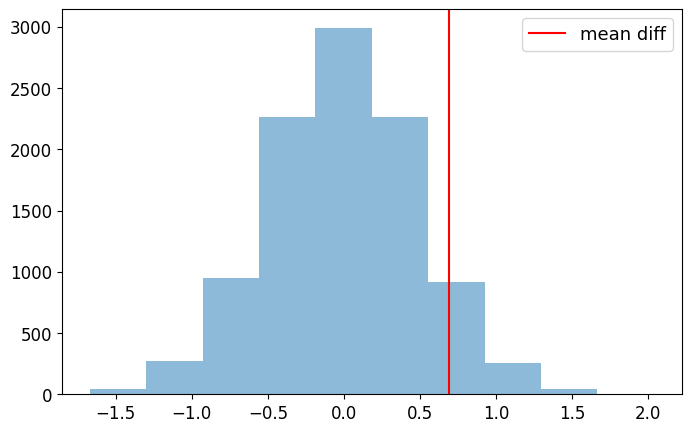

In [ ]:
diff_std = np.std(p_diffs)

plt.figure(figsize=(8,5))
null_vals = np.random.normal(0, diff_std, 10000) 
plt.hist(null_vals, alpha=0.5)
plt.axvline(mean_diff, color='r', label='mean diff')
plt.legend(fontsize=13, loc='upper right')
plt.show()

In [ ]:
(null_vals < mean_diff).mean()

0.9242



*   귀무가설을 기각했을 시 거짓일 확률이 92.2%이므로 기각할 수 없다
* Shooter 장르로 결정



#####매출 기대치

In [ ]:
np.random.seed(10)

sales_exp = []

for _ in range(10000):
    shooter_sp = np.random.choice(abtest_sh['NA_EU_Sales'], 30, replace=True)
    sales_exp.append(shooter_sp.mean())

0.57 2.25


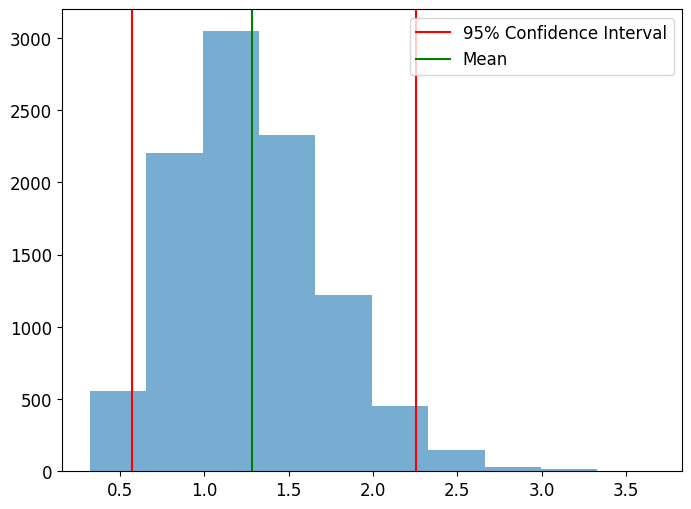

In [ ]:
sales_exp = np.array(sales_exp)

sales_mean = sales_exp.mean()
lower, upper = np.percentile(sales_exp, 2.5), np.percentile(sales_exp, 97.5) 

plt.figure(figsize=(8,6))
plt.hist(sales_exp, alpha=0.6)
plt.axvline(lower, c='red', label='95% Confidence Interval')
plt.axvline(upper, c='red')
plt.axvline(sales_mean, c='green', label='Mean')
plt.legend();

print(round(lower,2), round(upper,2))



*   표본분포의 95% 신뢰구간에 따르면, 최소 57만장에서 최대 225만장의 매출을 기대해볼 수 있습니다. 

